In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patterns import data2patterns, msd2pattern, print_frequent_patterns, msd2decision
from patterns import scaled_al_heatmap, unscaled_al_ggh_heatmap, scaled_al_ggh_heatmap

In [2]:
# input parameters 
lang='italian'
exp_dir='experiments'
bpe_n=1000
beam_size=1

# bpe files
bpe_file_dev='{}/{}/bpe{}/dev_segm'.format(exp_dir,lang,bpe_n)
bpe_file_train='{}/{}/bpe{}/train_high_segm'.format(exp_dir,lang,bpe_n)
bpe_file_test='{}/{}/bpe{}/test_segm'.format(exp_dir,lang,bpe_n)
bpe_files = [bpe_file_dev, bpe_file_train, bpe_file_test]

# attention files for chED+subwSELF-ATT model
attn_file_dev='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_file_train='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-train-high.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_file_test='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-test.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_files = [attn_file_dev, attn_file_train, attn_file_test]

# gold files
gold_file_dev='{}/{}/{}-dev'.format(exp_dir,lang,lang)
gold_file_train='{}/{}/{}-train-high'.format(exp_dir,lang,lang)
gold_file_test='{}/{}/{}-test'.format(exp_dir,lang,lang)
gold_files = [gold_file_dev, gold_file_train, gold_file_test]

### Pattern extraction

####  Transformation Patterns

In [3]:
attn_data = []
for f in attn_files:
    attn_data.extend(torch.load(f))

phen_msd = 'V;IND;PRS;3;PL' 
    
pattern_list = data2patterns(attn_data, allow_double_al=False)
phen_dict_regr, phen_dict_regr_freq, phen_dict_regr_acc = msd2pattern(phen_msd,
                                                                      attn_data,pattern_list,gold_files)

print_frequent_patterns(phen_msd, phen_dict_regr, 
                            phen_dict_regr_freq, phen_dict_regr_acc, n=15)

MSD V;IND;PRS;3;PL, frequency: 255, accuracy: 0.992157

frequency: 149, coverage: 0.5843137254901961, accuracy: 1.0
unmasekd_pattern:  c1 a r e --> c1 a n o
frequency by pattern:  {'c1 a r e --> c1 f2_0 f3_0 f4_0': 149}
alignments and masks for the most frequent masked pattern:

___mask2src_after_unmasking: c1: average length of 6.7

___trg2mask_after_unmasking (support 1): a:f2_0, n:f3_0, o:f4_0

___mask2trg_after_unmasking: c1: average length of 6.7

IDs: 184 : zampicare : zampicano, 316 : crogiolare : crogiolano, 490 : impiombare : impiombano, 491 : sibilare : sibilano, 497 : aureolare : aureolano, 510 : crossare : crossano, 653 : uggiolare : uggiolano, 728 : attovagliare : attovagliano, 836 : ragguagliare : ragguagliano, 861 : attivare : attivano, 881 : cauzionare : cauzionano, 933 : fiancheggiare : fiancheggiano, 1107 : oscillare : oscillano, 1127 : sfiorare : sfiorano, 1174 : ombrare : ombrano, 1231 : ideare : ideano, 1246 : sconfinare : sconfinano, 1303 : ridondare : ridondano, 

#### Lemma Patterns 

In [4]:
attn_data = []
for f in attn_files:
    attn_data.extend(torch.load(f))

print('Form ends on scono')
partial_trg = 'scono'
partial_msd = 'V;IND;PRS;3;PL'

phen_dict = msd2decision(partial_msd,partial_trg,attn_data,
                         gold_files,bpe_files,pattern='end',
                         n_global_heads=1,pull_max=False,ave_threshold=False)
for k,v in phen_dict.items():
    if k=='phen':
        print('class:{}, acc: {}, freq: {}'.format(k,
                                               v['acc']/v['freq'], v['freq']))
        str_out=''
        for p,f in sorted(v['pat'].items(), key=lambda x:x[1]['freq'], reverse=True):
            if f['freq']>=1:
                print('{}:{}/{}'.format(p,f['freq'],f['acc']/f['freq']))
                print('({})'.format(', '.join(f['ex'][:10])))
                str_out+='{}:{}/{} ({}), '.format(p,f['freq'],f['acc']/f['freq'],f['ex'][0])

print(str_out)

print()
print()
print('\nForm ends on ano')
partial_trg = 'ano'
partial_msd = 'V;IND;PRS;3;PL'

phen_dict = msd2decision(partial_msd,partial_trg,attn_data,
                         gold_files,bpe_files,pattern='end',
                         n_global_heads=1,pull_max=False,ave_threshold=False)
for k,v in phen_dict.items():
    if k=='phen':
        print('class:{}, acc: {}, freq: {}'.format(k,
                                               v['acc']/v['freq'], v['freq']))
        str_out=''
        for p,f in sorted(v['pat'].items(), key=lambda x:x[1]['freq'], reverse=True):
            if f['freq']>=1:
                print('{}:{}/{}'.format(p,f['freq'],f['acc']/f['freq']))
                print('({})'.format(', '.join(f['ex'][:10])))
                str_out+='{}:{}/{} ({}), '.format(p,f['freq'],f['acc']/f['freq'],f['ex'][0])

print(str_out)

print('\nForm ends on ono')
partial_trg = 'ono'
partial_trg_1 = 'scono'
partial_msd = 'V;IND;PRS;3;PL'

phen_dict = msd2decision(partial_msd,partial_trg,attn_data,
                         gold_files,bpe_files,pattern='end',
                         n_global_heads=1,pull_max=False,ave_threshold=False,
                        partial_trg_1=partial_trg_1, pattern_1='not_end')
for k,v in phen_dict.items():
    if k=='phen':
        print('class:{}, acc: {}, freq: {}'.format(k,
                                               v['acc']/v['freq'], v['freq']))
        str_out=''
        for p,f in sorted(v['pat'].items(), key=lambda x:x[1]['freq'], reverse=True):
            if f['freq']>=1:
                print('{}:{}/{}'.format(p,f['freq'],f['acc']/f['freq']))
                print('({})'.format(', '.join(f['ex'][:10])))
                str_out+='{}:{}/{} ({}), '.format(p,f['freq'],f['acc']/f['freq'],f['ex'][0])

print(str_out)

Form ends on scono
class:phen, acc: 1.0, freq: 23
*re:9/1.0
(903:in|z|o|ti|chi|re, 3798:inf|ar|ci|re, 5840:inf|r|ol|li|re, 5979:s|mar|ri|re, 6414:sch|er|mi|re, 7778:im|bi|an|chi|re, 10234:ac|cu|di|re, 10675:s|parti|re, 10802:su|pp|li|re)
*ire:7/1.0
(84:s|col|or|ire, 576:ac|can|ire, 2662:ar|gu|ire, 3397:in|can|ch|er|ire, 4714:cir|con|f|lu|ire, 6128:pre|mon|ire, 7644:re|tro|ag|ire)
*ir*:6/1.0
(2199:re|in|ser|ir|si, 4403:ost|ru|ir|si, 8217:sp|az|i|ent|ir|si, 8928:in|v|ag|h|ir|si, 9331:pro|st|itu|ir|si, 11455:tras|fer|ir|si)
*cir*:1/1.0
(6042:in|fer|o|cir|si)
*re:9/1.0 (903:in|z|o|ti|chi|re), *ire:7/1.0 (84:s|col|or|ire), *ir*:6/1.0 (2199:re|in|ser|ir|si), *cir*:1/1.0 (6042:in|fer|o|cir|si), 



Form ends on ano
class:phen, acc: 1.0, freq: 189
*are:149/1.0
(184:z|am|pic|are, 316:c|ro|gi|ol|are, 490:im|pi|o|mb|are, 491:si|bil|are, 497:au|re|ol|are, 510:c|ro|ss|are, 653:u|g|gi|ol|are, 728:att|ov|ag|li|are, 836:rag|gu|ag|li|are, 861:att|iv|are)
*arsi:26/1.0
(232:im|pa|per|arsi, 294:in|gu|ai|a

### Attention visualization examples

#### chED model

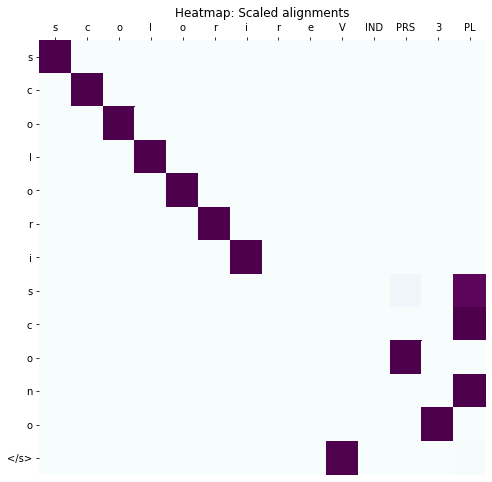

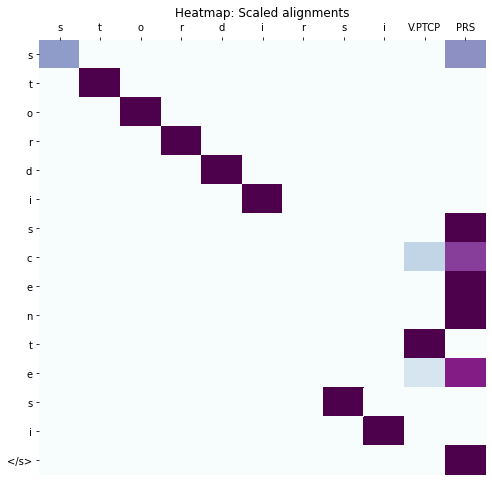

In [6]:
attn_file='{}/{}/ch/gate-sparse-models/predict/{}-dev.pred.{}.attn'.format(exp_dir,lang,lang,beam_size)

attn_data=torch.load(attn_file)

scaled_al_heatmap(attn_data,84)

scaled_al_heatmap(attn_data,15)

#### chED+chSELF-ATT

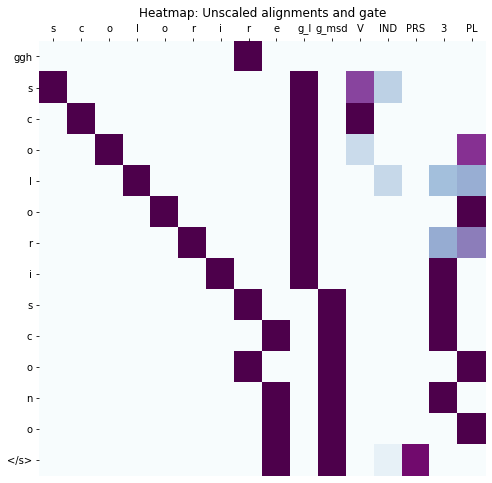

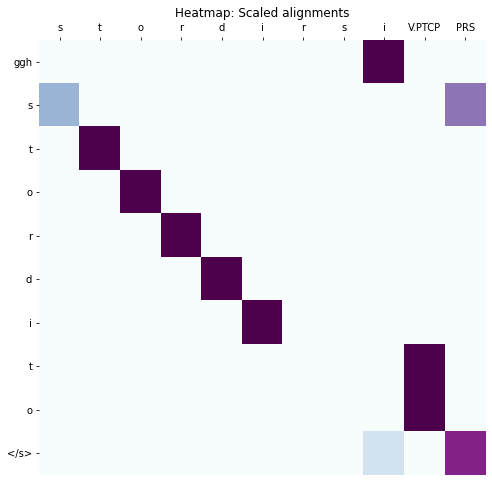

In [7]:
attn_file='{}/{}/ch/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,lang,beam_size)

attn_ggh_data=torch.load(attn_file)
unscaled_al_ggh_heatmap(attn_ggh_data,84,n_global_heads=1)
scaled_al_ggh_heatmap(attn_ggh_data,15,n_global_heads=1)

#### chED+subwSELF-ATT

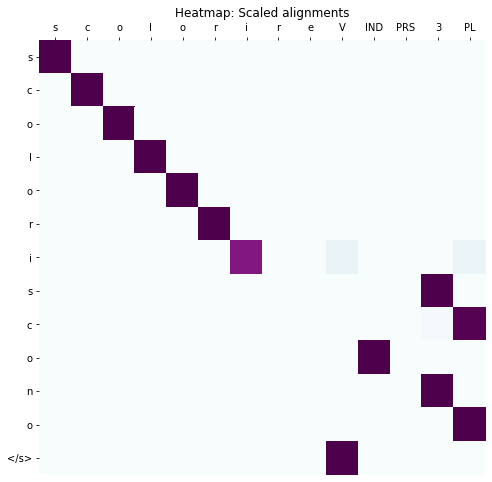

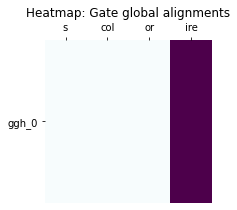

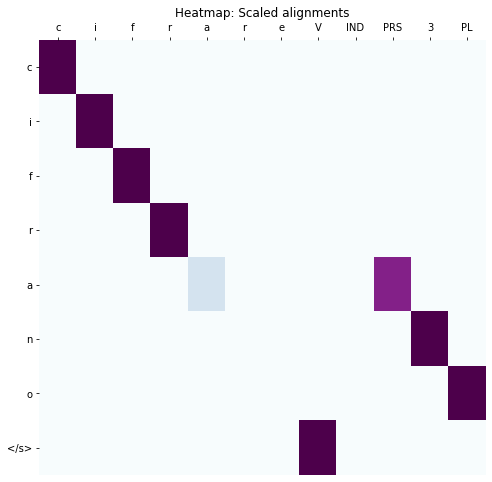

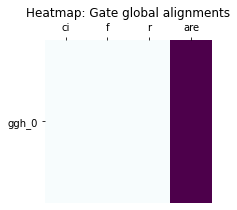

In [8]:
attn_file='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)

attn_ggh_bpe_data_comb=torch.load(attn_file)
scaled_al_ggh_heatmap(attn_ggh_bpe_data_comb,84, bpe=True, bpe_data=bpe_file_dev, n_global_heads=1)

attn_file='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-train-high.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)

attn_ggh_bpe_data_comb=torch.load(attn_file)
scaled_al_ggh_heatmap(attn_ggh_bpe_data_comb,7272, bpe=True, bpe_data=bpe_file_train, n_global_heads=1)

